Author: Cezary Januszek

*Created on Saturday, November 15th 2023*
# [Swisscom challenge] Flight delays prediction

#### Research question: *What is the influence of the different airlines/airports on the flight delays?*

The goal of this challenge is to investigate US flight delays and cancellations data from 2015.

First some exploratory data analysis is done to try to find some insights from general statistics about the airlines, airports and average flight delays. Second, using this same data the goal consists in creating a flight delay prediction model by implementing a:
1) baseline model 
2) complex model (Neural Network or other Deep Learning method)

The second model should have better performance than the baseline due to its increased complexity, which will make it also more difficult to explain its predictions.Therefore, an interpretability framework will be added to the second model to allow explicability of the created predictions.

# IV. Complex prediction model

In [1]:
# Imports
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import numpy as np
import torch

import seaborn as sns
sns.set_theme()
from IPython.core.pylabtools import figsize
figsize(10, 8)

from helper_functions import *

from collections import Counter
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#from interpret import show
#from interpret.glassbox import ExplainableBoostingClassifier

#from interpret import set_visualize_provider


In [2]:
# load the data
data = pd.read_pickle(os.path.abspath('./Data/flights_data.pkl'))


# cyclical encoding
data = cyclical_encode(data, 'DAY_OF_WEEK', 7)
data = cyclical_encode(data, 'DEPARTURE_DAY', 31)
data = cyclical_encode(data, 'DEPARTURE_MONTH', 12)
data = cyclical_encode(data, 'ARRIVAL_DAY', 31)
data = cyclical_encode(data, 'ARRIVAL_MONTH', 12)

data = cyclical_encode(data, 'SCHEDULED_DEPARTURE_HOUR', 24)
data = cyclical_encode(data, 'SCHEDULED_DEPARTURE_MIN', 60)
data = cyclical_encode(data, 'SCHEDULED_ARRIVAL_HOUR', 24)
data = cyclical_encode(data, 'SCHEDULED_ARRIVAL_MIN', 60)

data = data.drop(['DAY_OF_WEEK', 'DEPARTURE_DAY', 'DEPARTURE_MONTH', 'ARRIVAL_DAY', 'ARRIVAL_MONTH',
                             'SCHEDULED_DEPARTURE_HOUR', 'SCHEDULED_DEPARTURE_MIN', 'SCHEDULED_ARRIVAL_HOUR', 'SCHEDULED_ARRIVAL_MIN'], axis=1)


## Without DEPARTURE_DELAY feature

In [3]:
# separate data into feature matrix X and target variable vector Y
X = pd.get_dummies(data.drop(['ARRIVAL_DELAY'], axis=1))
Y = data['ARRIVAL_DELAY']

In [4]:
# train-test split with test size of 0.3
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)
print('Train samples: ', X_train.shape[0])
print('Test samples: ', X_test.shape[0])

Counter(Y_train)

Train samples:  976964
Test samples:  418700


Counter({0: 788206, 1: 128950, 2: 50797, 3: 9011})

In [5]:
# Addressing class imbalance with oversampling the minority classes with SMOTE and undersampling the majority class
#over-sampling with synthetic data - SMOTE
#oversample = SMOTE(sampling_strategy={1: 300000, 2:100000, 3:100000})
#X_train, Y_train = oversample.fit_resample(X_train, Y_train)
# random under-sampling
undersample = RandomUnderSampler(sampling_strategy={0: 500000})
X_train, Y_train = undersample.fit_resample(X_train, Y_train)

Counter(Y_train)

Counter({0: 500000, 1: 128950, 2: 50797, 3: 9011})

In [6]:
# MLP classifier model 

mlp = MLPClassifier(hidden_layer_sizes=(50, 50, 50), batch_size=512, max_iter=200, solver='adam', activation='relu', verbose=True)
mlp.fit(X_train, Y_train)

scores = cross_val_score(mlp, X_train, Y_train, cv=3)
print('Training accuracy = {:.3f}'.format(scores.mean()))


Iteration 1, loss = 1.40052915
Iteration 2, loss = 0.98394465
Iteration 3, loss = 0.90516688
Iteration 4, loss = 0.87256965
Iteration 5, loss = 0.84670971
Iteration 6, loss = 0.83524516
Iteration 7, loss = 0.83086304
Iteration 8, loss = 0.82858588
Iteration 9, loss = 0.82181808
Iteration 10, loss = 0.81870030
Iteration 11, loss = 0.81727344
Iteration 12, loss = 0.81623933
Iteration 13, loss = 0.81592238
Iteration 14, loss = 0.81480305
Iteration 15, loss = 0.81444671
Iteration 16, loss = 0.81265996
Iteration 17, loss = 0.81064164
Iteration 18, loss = 0.80928454
Iteration 19, loss = 0.80906183
Iteration 20, loss = 0.80800569
Iteration 21, loss = 0.80776688
Iteration 22, loss = 0.80695123
Iteration 23, loss = 0.80691701
Iteration 24, loss = 0.80596663
Iteration 25, loss = 0.80570427
Iteration 26, loss = 0.80553935
Iteration 27, loss = 0.80521987
Iteration 28, loss = 0.80471192
Iteration 29, loss = 0.80462603
Iteration 30, loss = 0.80412750
Iteration 31, loss = 0.80386681
Iteration 32, los

c:\Users\cezar\miniconda3\envs\sp80\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.14983227
Iteration 2, loss = 0.86703846
Iteration 3, loss = 0.85331551
Iteration 4, loss = 0.84673200
Iteration 5, loss = 0.84335804
Iteration 6, loss = 0.83365192
Iteration 7, loss = 0.83154546
Iteration 8, loss = 0.83054030
Iteration 9, loss = 0.82623231
Iteration 10, loss = 0.82606799
Iteration 11, loss = 0.82246697
Iteration 12, loss = 0.82010913
Iteration 13, loss = 0.81796212
Iteration 14, loss = 0.81659126
Iteration 15, loss = 0.81474954
Iteration 16, loss = 0.81459681
Iteration 17, loss = 0.81533662
Iteration 18, loss = 0.81308375
Iteration 19, loss = 0.81218368
Iteration 20, loss = 0.81137061
Iteration 21, loss = 0.81134972
Iteration 22, loss = 0.81048434
Iteration 23, loss = 0.80969634
Iteration 24, loss = 0.80859158
Iteration 25, loss = 0.80841489
Iteration 26, loss = 0.80724439
Iteration 27, loss = 0.80749028
Iteration 28, loss = 0.80684178
Iteration 29, loss = 0.80673611
Iteration 30, loss = 0.80621037
Iteration 31, loss = 0.80584891
Iteration 32, los

c:\Users\cezar\miniconda3\envs\sp80\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.11179177
Iteration 2, loss = 0.90174792
Iteration 3, loss = 0.87214446
Iteration 4, loss = 0.85755998
Iteration 5, loss = 0.84161795
Iteration 6, loss = 0.83898618
Iteration 7, loss = 0.83605090
Iteration 8, loss = 0.82969767
Iteration 9, loss = 0.82793593
Iteration 10, loss = 0.82463765
Iteration 11, loss = 0.82179280
Iteration 12, loss = 0.81974453
Iteration 13, loss = 0.81803644
Iteration 14, loss = 0.81553511
Iteration 15, loss = 0.81379353
Iteration 16, loss = 0.81182049
Iteration 17, loss = 0.81075772
Iteration 18, loss = 0.81022657
Iteration 19, loss = 0.80903161
Iteration 20, loss = 0.80892146
Iteration 21, loss = 0.80759499
Iteration 22, loss = 0.80801618
Iteration 23, loss = 0.80709420
Iteration 24, loss = 0.80661780
Iteration 25, loss = 0.80652652
Iteration 26, loss = 0.80601809


c:\Users\cezar\miniconda3\envs\sp80\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Training accuracy = 0.728


Cross-entropy loss = 0.631
Accuracy = 0.806
Precision = 0.713
Recall = 0.806
F1-score = 0.732
ROC-AUC = 0.707


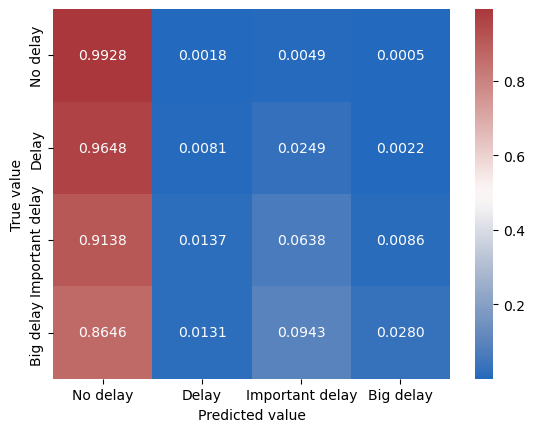

In [7]:
y_pred, y_pred_proba = clf_evaluate_metrics(mlp, X_test, Y_test)